In [478]:
import numpy as np
import matplotlib.pyplot as plt



In [479]:


def minH(l1, lh, ls, lp, m12):
    
    return np.sqrt(2)*np.sqrt(-m12)*np.sqrt(lp) / np.sqrt(( 8.0*l1*lh-lp*lp+4.0*lh*ls ))

#def minS (l1, lh, ls, lp, m12):
    
   #return np.sqrt(-m12)*np.sqrt(lh) / np.sqrt(( 8.0*l1*lh-lp**2+4.0*lh*ls))
   
def minS (vh,lp,lh):
    return np.sqrt((2*lh*vh**2)/(lp))

In [480]:
def M11(m12, lh, lp, ls, l1):
    return (8.0*m12*lh*lp ) / (-8.0*l1*lh + lp*lp - 4.0*lh*ls)

def M22(m12, lh, lp, ls, l1):
    return -(8.0*m12*lh*(2.0*l1+ls)) / (8.0*l1*lh - lp*lp + 4.0*lh*ls)

def M12_21(m12, lh, lp, ls, l1):
    return (4.0*m12*np.sqrt(lh)*pow(lp,1.5)) / (8.0*l1*lh - lp*lp + 4.0*lh*ls)




In [481]:
def mass1(a, b, c):
    return 0.5*(a+b-np.sqrt( (a-b)**2 +4.0*c*c))

def mass2(a, b, c):
    return 0.5*(a+b+np.sqrt( (a-b)**2 +4.0*c*c))

def mass3(m12, lh, lp, ls, l1):
    return 2.0*m12*(8.0*l1*lh + lp*lp - 4.0*lh*ls) / (8.0*l1*lh - lp*lp + 4.0*lh*ls)

In [482]:
def theta(a, b, c):
    return 0.5*np.arctan(2.0*c/(a-b))    

In [483]:
def physical_value_calc(m12,  lh,  lp,  ls,  l1):
    M_11 = M11(m12, lh, lp, ls, l1)
    M_22 = M22(m12, lh, lp, ls, l1)
    M_12_21 = M12_21(m12, lh, lp, ls, l1)
    
    m1sqrt = mass1(M_11, M_22, M_12_21)
    m2sqrt = mass2(M_11, M_22, M_12_21)
    m3sqrt = mass3(m12, lh, lp, ls, l1)

    if m1sqrt>0 and m2sqrt>0 and m3sqrt>0:
        
        m1 = np.sqrt(m1sqrt)
        m2 = np.sqrt(m2sqrt)
        m3 = np.sqrt(m3sqrt)

        th = theta(M_11, M_22, M_12_21)

        vh=minH(l1, lh, ls, lp, m12)

        vs=minS(vh, lp, lh)
    
        return m1, m2, m3, th, vh, vs

    else:
        return 0,0,0,0,0,0



In [ ]:
#finding good points with 10 % error


TrueMass=0.12511
TrueVev=0.24622

max_m12=-0.1
min_m12=-10
max_s=10
min_s=0.1
max_h = 0.0647
min_h = 0.0642


min_p=0.00001
max_p=0.002


valid_points=[]


while True:
    m12=np.random.uniform(min_m12,max_m12)
    lh=np.random.uniform(min_h,max_h)
    lp=np.random.uniform(min_p,max_p)
    ls=np.random.uniform(min_s,max_s)
    l1=np.random.uniform(-ls,ls)


    if ls >= -2*l1 and ls >= 2*l1:

        m1, m2, m3, th, vh ,vs = physical_value_calc(m12,  lh,  lp,  ls,  l1)

        if m1!=0 and m2!=0 and m3!=0 and th!=0 and vh!=0 and th<0.15:

            error_mass=abs(m1-TrueMass)/TrueMass
            error_vev=abs(vh-TrueVev)/TrueVev
            error_vs= 0.1#abs(vs-fixed_v_s)/fixed_v_s

            if error_mass < 0.1  and error_vev < 0.1 and error_vs < 0.5:
                
                valid_points.append([m12, lh, lp, ls, l1, m1, m2, m3, th, vh, vs, error_mass,error_vev,error_vs])

                if len(valid_points)%1==0:
                   print(len(valid_points))
                    
                if len(valid_points)>=5000:
                    
                    break

print(valid_points)



#Dont be confused why I also calculated a error for v_s. This was when I wanted to let the code find points for a fixed v_s.

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
#Tune them to have the wished accuracy


fine_tuned_points=[]
m_s1_theta_points=[]
m_s2_theta_points=[]
m_12_theta_points=[]
min_m_s1_m_s2=[]
v_s_points=[]
dispersion=0.01
dispersionlh=0.0001
goal_error=0.001
goal_error_vs=0.5


for point in valid_points:
    m12, lh, lp, ls, l1, m1, m2, m3, th, vh,vs, first_error_mass, first_error_vev, first_error_vs = point

    while True:
        m12_new= np.random.normal(m12,dispersion)
        lh_new = np.random.normal(lh, dispersionlh)
        lp_new = np.random.normal(lp, dispersion)
        ls_new = np.random.normal(ls, dispersion)
        l1_new = np.random.normal(l1, dispersion)


        if ls_new >= -2*l1_new and ls_new >= 2*l1_new and min_m12<=m12_new<=max_m12 and min_h<=lh_new<=max_h and min_p<=lp_new<=max_p and min_s<=ls_new<=max_s:

            if ls_new >= -2*l1_new and ls_new >= 2*l1_new:
                m1_new, m2_new, m3_new, th_new, vh_new, vs_new = physical_value_calc(m12_new,  lh_new,  lp_new,  ls_new,  l1_new)

                if m1_new!=0 and m2_new!=0 and m3_new!=0 and th_new!=0 and vh_new!=0:
                    
                    error_mass = abs(m1_new-TrueMass)/TrueMass 
                    error_vev = abs(vh_new-TrueVev)/TrueVev
                    error_vs= 0 #abs(vs_new-fixed_v_s)/fixed_v_s
                    
                    if error_mass < first_error_mass and error_vev < first_error_vev: #and error_vs <= 2* first_error_vs:
                        if error_mass < goal_error and error_vev < goal_error: #and error_vs < goal_error_vs:
                            fine_tuned_points.append([m12_new, lh_new, lp_new, ls_new, l1_new, m1_new, m2_new, m3_new, th_new, vh_new])
                            m_s1_theta_points.append([m2_new, th_new])
                            m_s2_theta_points.append([m3_new, th_new])
                            min_m_s1_m_s2.append([min(m2_new,m3_new), th_new])
                            m_12_theta_points.append([m12_new, th_new])
                            v_s_points.append([vs_new, th_new])
                            if len(fine_tuned_points)%1==0:
                                print(len(fine_tuned_points))
                            break
                        else:
                            lh, lp, ls, l1, m12 = lh_new, lp_new, ls_new, l1_new, m12_new
                            m1, m2, m3, th, vh, vs = m1_new, m2_new, m3_new, th_new, vh_new, vs_new

                    else:
                        pass
        else:
            pass


#Hier muss man noch machen dass die paramter am ende auch immer noch in den gewünschten grenzen sind


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [486]:
l_1_list = [point[4] for point in fine_tuned_points]
v_s_list = [point[0] for point in v_s_points]
ls_list = [point[3] for point in fine_tuned_points]
lp_list =[point[2] for point in fine_tuned_points]
m_sR_list = [point[6] for point in fine_tuned_points]  # m2
m_sI_list = [point[7] for point in fine_tuned_points]  # m3
lh_list =[point[1] for point in fine_tuned_points]
m12_list =[point[0] for point in fine_tuned_points]
th_list =[point[8] for point in fine_tuned_points]
print(lh_list)
print(v_s_list)
print(l_1_list)
print(ls_list)
print(min(lp_list))
print(lp_list)
print(max(lp_list))
print(m_sR_list)
print(m_sI_list)
print(m12_list)

[0.0645716797338389, 0.064380441619794, 0.06446341062897835, 0.06465725155239653, 0.06467756953447547, 0.06451189717839186, 0.06463852734262471, 0.06450789984604623, 0.06441670728375883, 0.06452097323108884, 0.0644387012977141, 0.0643959447079977, 0.06453714244527246, 0.06441877368179445, 0.06444559896325565, 0.06449218059708305, 0.06435348302013054, 0.0644321689188802, 0.06451747640771562, 0.06464147820452533, 0.0644343064767543, 0.06451194509058648, 0.06445691556033474, 0.06458771139771435, 0.06465214877716499, 0.06453324526020104, 0.06469171451798028, 0.0645432706438267, 0.06461375951872676, 0.06438869139887521, 0.06453372720477378, 0.06434291779756668, 0.06459808014318658, 0.0645224195761616, 0.06457389358194716, 0.06463327281789771, 0.06437326476801315, 0.06437285701240392, 0.06438791932224963, 0.06460606279103268, 0.06460973898889931, 0.0644087917769854, 0.06461635702028844, 0.06453215253576805, 0.06442046171356287, 0.06450384815070277, 0.06451046949994658, 0.0646297303949353, 0.

In [487]:
lambdaSToLmabda1 = [ls/l_1 for ls, l_1 in zip(ls_list, l_1_list)]
print(lambdaSToLmabda1)

[-3.255220301396857, 2.148187790509431, -2.5127457549229724, -4.011070084213107, 74.06762773744659, 8.005882883260599, -8.13363312638091, -3.1737354270385465, -2.314144436734983, -2.410524633634087, -4.382398137052117, -3.4812482271118115, -5.396089408353911, 3.8318490657575377, -6.619817497020529, -10.239317559210695, -2.229042199956917, -4.246278763064512, -2.474510147004707, -2.55414719270681, -2.5913677449040704, -2.949885466434461, 2.186020554932711, -4.294743110857137, -7.17931006779724, 27.19965013957615, -2.5755585176720053, -9.114547287871359, -44.42704469345494, -2.5499050300915385, -2.3585789713496355, 2.744315350501434, -2.738883902556267, 3.765420803680214, 2.3797664731786643, 3.990860990583371, -7.362093217516925, -40.536882108952824, -2.5541402874370376, -2.1022802715669298, -4.116580958197375, -3.037625383120277, -3.2567956562409135, -2.465123701513615, -2.2381348095246447, -2.895582434473103, -2.203416260360185, -40.4734622472923, -7.338682307133294, 5.373354463349339,

In [488]:
def decay_width_sR_sI_sI(m_sR, m_sI, l1, ls, v_s):
    if m_sR < 2 * m_sI:
        return 0.0
    else:
        return (np.sqrt(m_sR**2 * (-4 * m_sI**2 + m_sR**2)) * (12 * v_s * l1 - 2*v_s* ls)**2) / (32*np.pi * m_sR**3)

5000


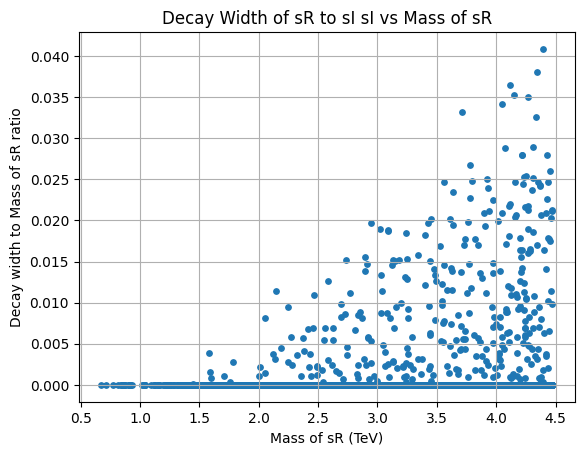

[0.0, 0.09070080187770241, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.045149469097061065, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005547839408544097, 0.0, 0.0, 0.09077699887712597, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003972183926053279, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016098497382569726, 0.0, 0.0, 0.0, 0.04452353537236183, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007899338962628401, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003992690859004211, 0.0, 0.0, 0.07269079478404236, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [489]:
#Plot decay width of sR -> sI sI
decay_widths = [decay_width_sR_sI_sI(m_sR, m_sI, l1, ls, v_s) for m_sR, m_sI, l1, ls, v_s in zip(m_sR_list, m_sI_list, l_1_list, ls_list, v_s_list)]
print(len(decay_widths))
decay_width_to_m_sR_ratio = [decay_width/m_sR for decay_width, m_sR in zip(decay_widths, m_sR_list)]
plt.scatter(m_sR_list, decay_width_to_m_sR_ratio,s=15)
plt.xlabel('Mass of sR (TeV)')
plt.ylabel('Decay width to Mass of sR ratio')
plt.title('Decay Width of sR to sI sI vs Mass of sR')
plt.grid(True)
plt.show()

print(decay_widths)

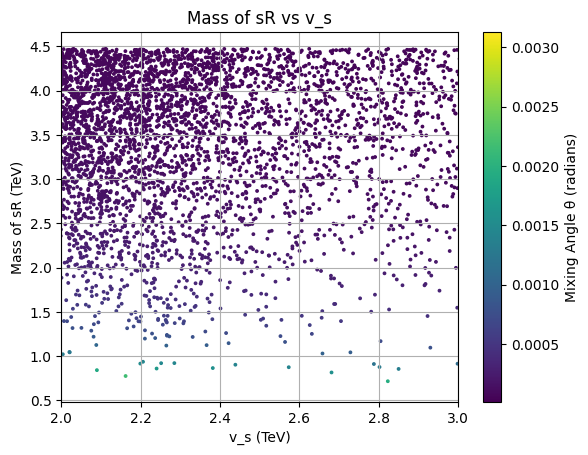

In [490]:
plt.scatter(v_s_list,m_sR_list,c=th_list,s=3)
plt.colorbar(label='Mixing Angle θ (radians)')
plt.xlabel('v_s (TeV)')
plt.ylabel('Mass of sR (TeV)')
plt.title('Mass of sR vs v_s')
plt.xlim(2,3)
plt.grid(True)
plt.show()

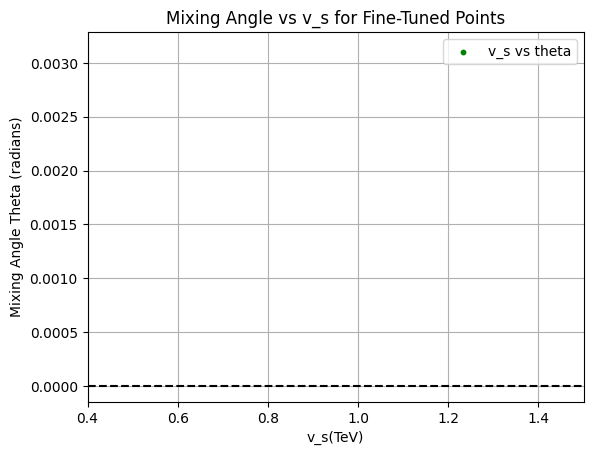

In [491]:
plt.scatter([point[0] for point in v_s_points], [point[1] for point in v_s_points], color='green', label='v_s vs theta',s=10)
plt.axhline (y=0, color='black', linestyle='--')
plt.xlabel('v_s(TeV)')
plt.ylabel('Mixing Angle Theta (radians)')  
plt.title('Mixing Angle vs v_s for Fine-Tuned Points')
plt.legend()
plt.xlim(0.4,1.5)
plt.grid(True)
plt.savefig('v_s_theta_plot.png')
plt.show()

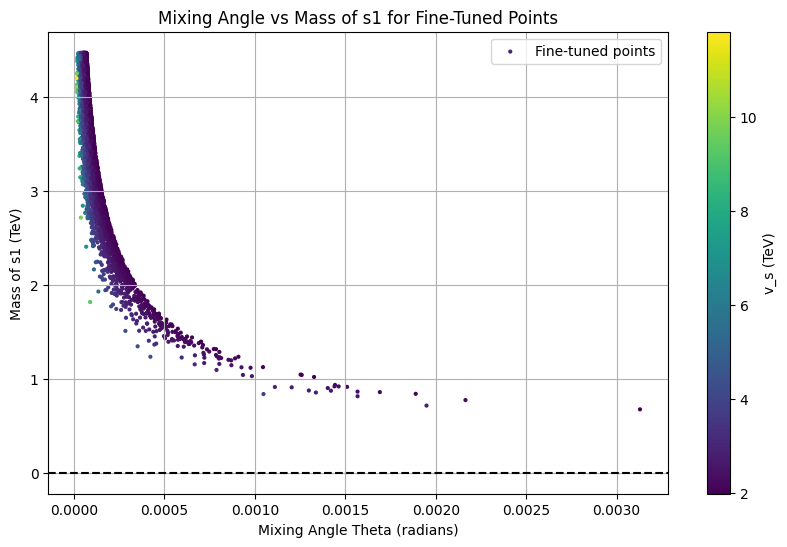

In [502]:
plt.figure(figsize=(10,6))
plt.scatter( [point[1] for point in m_s1_theta_points], [point[0] for point in m_s1_theta_points],c=[point[0] for point in v_s_points], label='Fine-tuned points',s=4)
plt.colorbar(label='v_s (TeV)')
plt.axhline (y=0, color='black', linestyle='--')
plt.ylabel('Mass of s1 (TeV)')
plt.xlabel('Mixing Angle Theta (radians)')  
plt.title('Mixing Angle vs Mass of s1 for Fine-Tuned Points')
plt.legend()
plt.grid(True)
plt.savefig('m_s1_theta_plot.png')
plt.show()

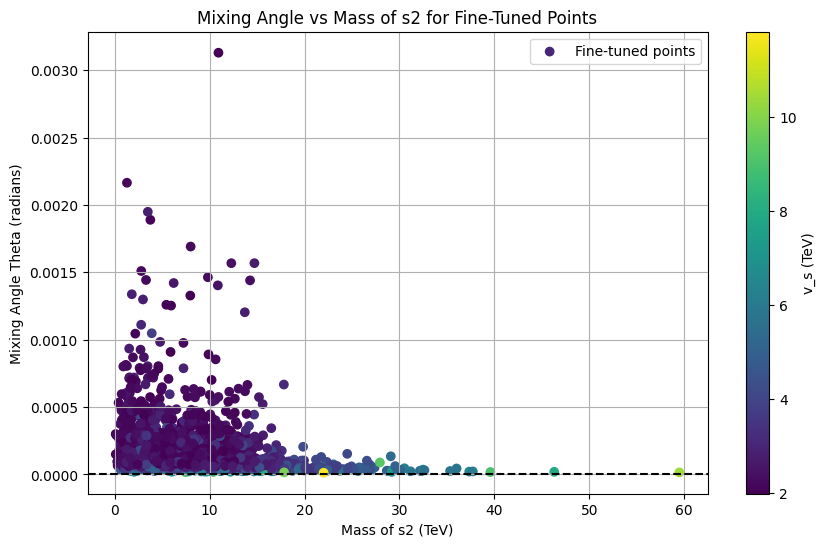

<Figure size 640x480 with 0 Axes>

In [493]:
plt.figure(figsize=(10,6))
plt.scatter([point[0] for point in m_s2_theta_points], [point[1] for point in m_s2_theta_points], c=[point[0] for point in v_s_points], label='Fine-tuned points')
plt.colorbar(label='v_s (TeV)') 
plt.axhline (y=0, color='black', linestyle='--')
plt.xlabel('Mass of s2 (TeV)')
plt.ylabel('Mixing Angle Theta (radians)')
plt.title('Mixing Angle vs Mass of s2 for Fine-Tuned Points')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('m_s2_theta_plot.png')

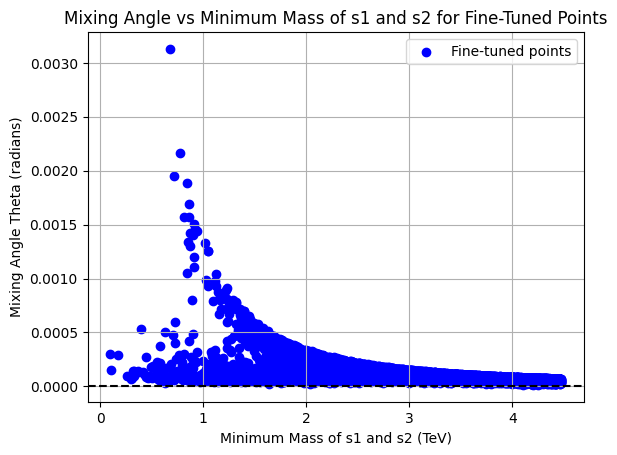

<Figure size 640x480 with 0 Axes>

In [494]:
plt.scatter([point[0] for point in min_m_s1_m_s2], [point[1] for point in min_m_s1_m_s2], color='blue', label='Fine-tuned points')
plt.axhline (y=0, color='black', linestyle='--')
plt.xlabel('Minimum Mass of s1 and s2 (TeV)')
plt.ylabel('Mixing Angle Theta (radians)')
plt.title('Mixing Angle vs Minimum Mass of s1 and s2 for Fine-Tuned Points')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('min_m_s1_s2_theta_plot.png')

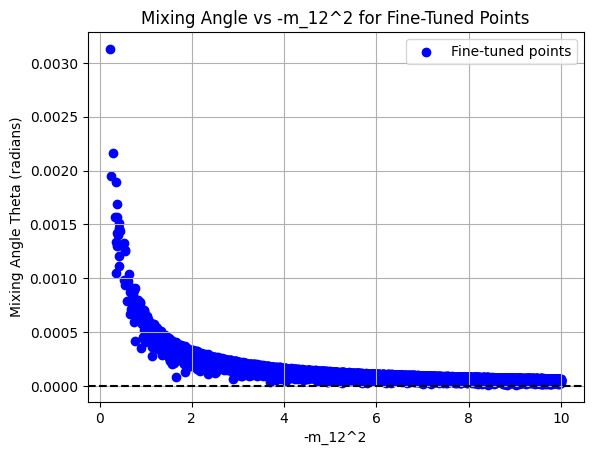

<Figure size 640x480 with 0 Axes>

In [495]:
plt.scatter([-point[0] for point in m_12_theta_points], [point[1] for point in m_12_theta_points], color='blue', label='Fine-tuned points')
plt.axhline (y=0, color='black', linestyle='--')
plt.xlabel('-m_12^2')
plt.ylabel('Mixing Angle Theta (radians)')
plt.title('Mixing Angle vs -m_12^2 for Fine-Tuned Points')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('m_12_theta_plot.png')

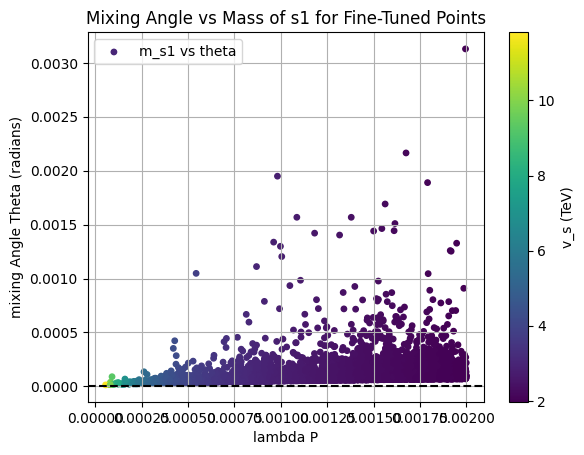

In [496]:
plt.scatter([point[2] for point in fine_tuned_points], [point[8] for point in fine_tuned_points], c=[point[0] for point in v_s_points], label='m_s1 vs theta', s=15)

plt.colorbar(label='v_s (TeV)')
plt.axhline (y=0, color='black', linestyle='--')
plt.xlabel('lambda P')
plt.ylabel('mixing Angle Theta (radians)')  
plt.title('Mixing Angle vs Mass of s1 for Fine-Tuned Points')
plt.legend()
plt.grid(True)
plt.savefig('m_s1_theta_plot.png')
plt.show()

/var/folders/gm/nqgbbw_d2bq7qvkj2g9b25dw0000gn/T/ipykernel_16754/3415858038.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


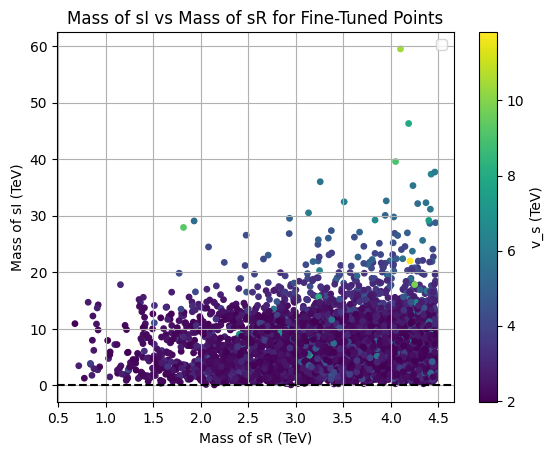

In [497]:
plt.scatter([point[6] for point in fine_tuned_points],[point[7] for point in fine_tuned_points], c=[point[0] for point in v_s_points], s=15)
plt.colorbar(label='v_s (TeV)')
plt.axhline (y=0, color='black', linestyle='--')
plt.xlabel('Mass of sR (TeV)')
plt.ylabel('Mass of sI (TeV)')  
plt.title('Mass of sI vs Mass of sR for Fine-Tuned Points')
plt.legend()
plt.grid(True)
plt.savefig('m_s2_theta_plot.png')
plt.show()

In [543]:
m_H = 0.12511
v_s_fix = [1,2,3]
v_h = 0.24622

lh = 1/8#0.0644



def f(theta_,m_s):
    return (-m_H**4 + m_s**4) * np.sin(2*theta_) - 0.5*(m_H**2 - m_s**2)**2 * np.sin(4*theta_) 

theta_scan= np.linspace(0,0.003,1000)
m_s_scan = np.linspace(0,5,1000)

f_fixed = [4 * lh**2 * v_h**4 /(v_s_fixe**4)*v_s_fixe**3 *v_h for v_s_fixe in v_s_fix]


/var/folders/gm/nqgbbw_d2bq7qvkj2g9b25dw0000gn/T/ipykernel_16754/1928948913.py:8: UserWarning: The following kwargs were not used by contour: 'label'
  CS = plt.contour(


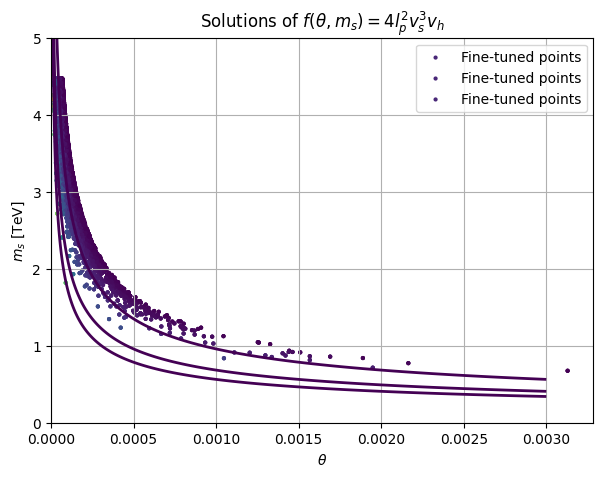

In [544]:
Theta, Ms = np.meshgrid(theta_scan, m_s_scan)
F = f(Theta, Ms)


plt.figure(figsize=(7,5))

for ff, vs in zip(f_fixed, v_s_fix):
    CS = plt.contour(
        Theta, Ms, F,
        levels=[ff],
        linewidths=2,
        label=f"$v_s={vs}$"
    )
    plt.scatter( [point[1] for point in m_s1_theta_points], [point[0] for point in m_s1_theta_points],c=[point[0] for point in v_s_points], label='Fine-tuned points',s=4)

plt.xlabel(r"$\theta$")
plt.ylabel(r"$m_s$ [TeV]")
#plt.axvline(x=0.15, color='black', linestyle='--')
plt.legend()
plt.title(r"Solutions of $f(\theta,m_s)=4 l_p^2 v_s^3 v_h$")
plt.grid()
plt.show()


/var/folders/gm/nqgbbw_d2bq7qvkj2g9b25dw0000gn/T/ipykernel_16754/3076414960.py:13: UserWarning: The following kwargs were not used by contour: 'label'
  CS = plt.contour(


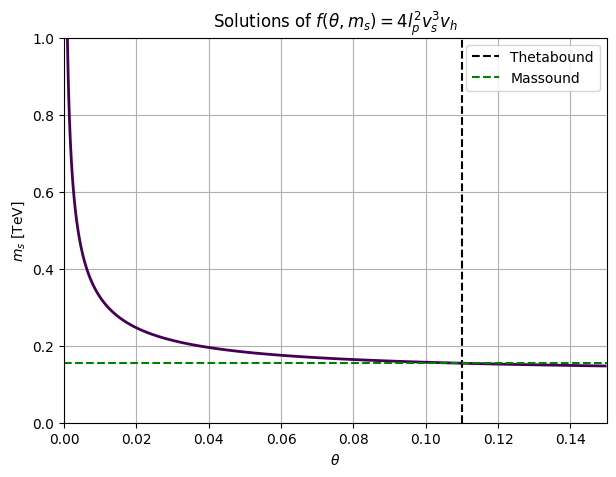

In [553]:
v_s_fix_extended = [2]
theta_scan_extended= np.linspace(0,0.15,1000)
m_s_scan_extended = np.linspace(0,1,1000)


Theta, Ms = np.meshgrid(theta_scan_extended, m_s_scan_extended)
F = f(Theta, Ms)


plt.figure(figsize=(7,5))

for ff, vs in zip(f_fixed, v_s_fix_extended):
    CS = plt.contour(
        Theta, Ms, F,
        levels=[ff],
        linewidths=2,
        label=f"$v_s={vs}$"
    )

plt.xlabel(r"$\theta$")
plt.ylabel(r"$m_s$ [TeV]")
plt.axvline(x=0.11, color='black', linestyle='--',label="Thetabound")
plt.axhline (y=0.155, color='green', linestyle='--',label="Massound")
plt.title(r"Solutions of $f(\theta,m_s)=4 l_p^2 v_s^3 v_h$")
plt.legend()
plt.grid()
plt.show()

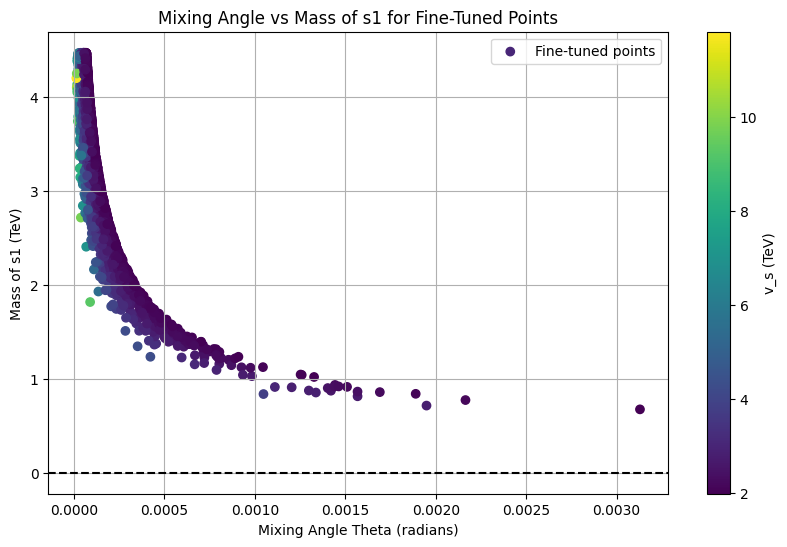

In [501]:
plt.figure(figsize=(10,6))
plt.scatter( [point[1] for point in m_s1_theta_points], [point[0] for point in m_s1_theta_points],c=[point[0] for point in v_s_points], label='Fine-tuned points')
plt.colorbar(label='v_s (TeV)')
plt.axhline (y=0, color='black', linestyle='--')
plt.ylabel('Mass of s1 (TeV)')
plt.xlabel('Mixing Angle Theta (radians)')  
plt.title('Mixing Angle vs Mass of s1 for Fine-Tuned Points')
plt.legend()
plt.grid(True)
plt.savefig('m_s1_theta_plot.png')
plt.show()